# Reversal & Continous Pattern


In [ ]:
import numpy as np
import pandas as pd
import pandas_ta as ta
from datetime import datetime,timedelta
import plotly.express as px
import plotly.graph_objects as go
import mplfinance as mpf
import matplotlib.pyplot as plt
from head_shoulders import find_hs_patterns, get_pattern_return
# np.version.version
from perceptually_important import find_pips 
from  flags_pennants import find_flags_pennants_trendline, plot_flag
plt.style.use('dark_background')
from head_shoulders import plot_hs, find_hs_patterns

In [ ]:
import vectorbtpro as vbt
vbt.settings.set_theme("dark")

In [ ]:
data = vbt.TVData.fetch('NASDAQ:GOOG', timeframe = '1 day')    
#initialize dataFrame

df = pd.DataFrame(data.get())
# df = df.round(2)
df.index = pd.to_datetime(df.index.date)
data.get()


In [ ]:
df = pd.DataFrame()
df.ta.indicators()

trend line 
- gap ห่างกันบางทีลากไม่ได้
- low -> ลากจากจุด low ไปยัง (ยก low)


neurotrader

In [ ]:
data = vbt.TVData.fetch('NASDAQ:GOOG', timeframe = '1 day').get()
data

In [ ]:
# data = data.loc[(data.index > '2015-01-01') & (data.index <= '2015.12.31')]
data


In [ ]:
# i = len(data)
# x = data['Close'].iloc[i-40:i].to_numpy()
# n_pips = 7
# pips_x, pips_y = find_pips(x, n_pips, 2)
# pd.Series(x).plot()
# for i in range(n_pips):
#     plt.plot(pips_x[i], pips_y[i], marker='o', color='red')
# plt.plot(pips_x, pips_y, linestyle = 'dotted')
# plt.show()

find flag find_flags_pennants_trendline

In [ ]:
data = pd.read_csv('BTCUSDT3600.csv')
data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')

data = np.log(data)
dat_slice = data['close'].to_numpy()
bull_flags, bear_flags, bull_pennants, bear_pennants  = find_flags_pennants_trendline(dat_slice, 10)

In [ ]:
# len(bull_flags)
plot_flag(data, bull_flags[1])
pips_x = [bull_flags[1].base_x, bull_flags[1].tip_x, bull_flags[1].conf_x ]
pips_y = [bull_flags[1].base_y, bull_flags[1].tip_y, bull_flags[1].conf_y ]
x = np.arange(len(data))
coefs = np.polyfit(x, data, 1)
# plt.plot(pips_x, pips_y, linestyle = 'dotted')
# plt.plot(pips_x, pips_y, x,y, x1, y1,linestyle = 'dotted')

FlagPattern(
base_x=383, base_y=9.265238759369101,  
tip_x=409, tip_y=9.366447679362416,   
conf_x=419, conf_y=9.328288300528113,   


pennant=False, flag_width=10, flag_height=0.054841344378456114,  
pole_width=26, pole_height=0.10120891999331505,  
support_intercept=9.3590765381409, support_slope=-0.005731432020040644,  
resist_intercept=9.369864301566853, resist_slope=-0.004462154811281455) 

In [ ]:
i = len(data)
x = data['Close'].iloc[i-40:i].to_numpy()
n_pips = 7
pips_x, pips_y = find_pips(x, n_pips, 2)
print(pips_y[0])
pd.Series(x).plot()
for i in range(n_pips):
    plt.plot(pips_x[i], pips_y[i], marker='o', color='red')
plt.plot(pips_x, pips_y, linestyle = 'dotted')
plt.show()

In [354]:
class FlagPattern:
    base_x: int         # Start of the trend index, base of pole
    base_y: float       # Start of trend price

    tip_x: int   = -1       # Tip of pole, start of flag
    tip_y: float = -1.

    conf_x: int   = -1      # Index where pattern is confirmed
    conf_y: float = -1.      # Price where pattern is confirmed

    pennant: bool = False      # True if pennant, false if flag

    flag_width: int    = -1
    flag_height: float = -1.

    pole_width: int    = -1
    pole_height: float = -1.

    # Upper and lower lines for flag, intercept is tip_x
    support_intercept: float = -1.
    support_slope: float = -1.
    resist_intercept: float = -1.
    resist_slope: float = -1.

In [341]:
def cont_pattern(pips_y):
    # --continuation Patterns ---------- pips_y
    upper_b = 0 # 1 is bull 0 is bear
    lower_b = 0 # 1 is bull 0 is bear
    if pips_y[0] > pips_y[1]: # coming with bull
        isbull = 1
        high, low = (pips_y[0], pips_y[1])
        for i in range(len(pips_y)):
            if i%2 == 0 and high >= pips_y[i]:
                high = pips_y[i]
            elif i%2 == 0 and high < pips_y[i]: 
                high = pips_y[i]
                upper_b = 1 
            if i%2 == 1 and low >= pips_y[i]:
                low = pips_y[i]
            elif i%2 == 1 and low < pips_y[i]:     
                low = pips_y[i]
                lower_b = 1
    else:
        isbull = 0
        low, high = (pips_y[0], pips_y[1])
        for i in range(len(pips_y)-1):
            if i%2 == 0 and low >= pips_y[i]:
                low = pips_y[i]
            elif i%2 == 0 and low < pips_y[i]: 
                low = pips_y[i]
                upper_b = 1 
            if i%2 == 1 and high >= pips_y[i]:
                high = pips_y[i]
            elif i%2 == 1 and high < pips_y[i]:     
                high = pips_y[i]
                lower_b = 1
    if isbull == 0 and upper_b == 1 and lower_b == 1:
        print('Rising Wedge - Continuation')
    if isbull == 1 and upper_b == 0 and lower_b == 0:
        print('Falling Wedge - Continuation')
    if isbull == 1 and upper_b == 1 and lower_b == 1:
        print('Rising Wedge - Reversal Pattern')
    if isbull == 0 and upper_b == 0 and lower_b == 0:
        print('Falling Wedge - Reversal Pattern')
    if isbull == 1 and upper_b == 0 and lower_b == 1:
        print('Bullish Pennant')
    if isbull == 0 and upper_b == 0 and lower_b == 1:
        print('Bearish Pennant')

In [ ]:
data = pd.read_csv('BTCUSDT3600.csv')
# data = vbt.TVData.fetch('NASDAQ:GOOG', timeframe = '1 day').get()    

data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')

data = np.log(data)
dat_slice = data['close'].to_numpy()
bull_flags, bear_flags, bull_pennants, bear_pennants  = find_flags_pennants_trendline(dat_slice, 10)
def plot_flag(candle_data: pd.DataFrame, pattern: FlagPattern, pad=2, n_pips=5,
              dist_measure=2):
    if pad < 0:
        pad = 0

    start_i = pattern.base_x - pad
    end_i = pattern.conf_x + 1 + pad
    dat = candle_data.iloc[start_i:end_i]
    idx = dat.index
    plt.style.use('dark_background')
    fig = plt.gcf()
    ax = fig.gca()
    tip_idx = idx[pattern.tip_x - start_i]
    conf_idx = idx[pattern.conf_x - start_i]

    pole_line = [(idx[pattern.base_x - start_i], pattern.base_y), (tip_idx, pattern.tip_y)]
    upper_line = [(tip_idx, pattern.resist_intercept), (conf_idx, pattern.resist_intercept + pattern.resist_slope * pattern.flag_width)]
    lower_line = [(tip_idx, pattern.support_intercept), (conf_idx, pattern.support_intercept + pattern.support_slope * pattern.flag_width)]

    mpf.plot(dat, alines=dict(alines=[pole_line, upper_line, lower_line], colors=['w', 'b', 'b']), type='candle', style='charles', ax=ax)

    # ---------find_pips-----------------
    # dist_measure
    # 1 = Euclidean Distance
    # 2 = Perpindicular Distance
    # 3 = Vertical Distance
    # initial DataFrame 
    x = pd.DataFrame({'close' : candle_data['close'], 
                      'idx' : [ i for i in range(len(candle_data)) ] })
    x_num = x['close'].iloc[pattern.tip_x:pattern.conf_x + 1].to_numpy()
    x_idx = x['idx'].iloc[pattern.tip_x - start_i:pattern.conf_x - start_i + 1].to_numpy()
    pips_x, pips_y = find_pips(x_num, n_pips, dist_measure)
    pips_x = [i + pattern.tip_x - start_i for i in pips_x]
    plt.plot(x_idx, x_num)
    for i in range(n_pips):
        plt.plot(pips_x[i], pips_y[i], marker='o', color='red')
    plt.plot(pips_x, pips_y)
    plt.show()
    
    cont_pattern(pips_y)

    # pips_y = np.array(pips_y)
    # print(pips_y)
    # candle_data = np.exp(candle_data)
    # tmp = candle_data.iloc[pattern.conf_x:] 
    #check state which is bull flag or bear flag 
    # exit = tmp.loc[tmp['close'] >= 1.10 * np.exp(pips_y)[-1]]['close']#.iloc[0]
    # print(exit)
    # entry = np.exp(pips_y[-1])
    # print(tmp.loc[tmp['close'] >= 1.30 * pips_y[-1]])
    # print('profit is',exit.iloc[0] - entry)
    # candle_data = np.log(candle_data)
    # print(candle_data)
# bull_pennants
# plot_flag(data, bull_pennants[2], n_pips = 5)
# กำหนด time period แล้ว หา flag return entry บลาๆ

In [ ]:
# fig = go.Figure(data=[go.Candlestick(x=data.index,
#                 open=data['open'],
#                 high=data['high'],
#                 low=data['low'],
#                 close=data['close'])])

# fig.show()
# data

In [ ]:
data = pd.read_csv('BTCUSDT3600.csv')
data['date'] = data['date'].astype('datetime64[s]')
data = data.set_index('date')

In [ ]:
data.iloc[409:]
# 1. buy now ! 2. breakout and wait buy at retest 3. still going
# if bullish price > price

In [ ]:
class HSPattern:

    # True if inverted, False if not. Inverted is "bullish" according to technical analysis dogma
    inverted: bool

    # Indices of the parts of the H&S pattern
    l_shoulder: int = -1
    r_shoulder: int = -1
    l_armpit: int = -1
    r_armpit: int = -1
    head: int = -1
   
    # Price of the parts of the H&S pattern. _p stands for price.
    l_shoulder_p: float = -1
    r_shoulder_p: float = -1
    l_armpit_p: float = -1
    r_armpit_p: float = -1
    head_p: float = -1
   
    start_i: int = -1
    break_i: int = -1
    break_p: float = -1

    neck_start: float = -1
    neck_end: float = -1

    # Attributes
    neck_slope: float = -1
    head_width: float = -1
    head_height: float = -1
    pattern_r2: float = -1

def compute_pattern_r2(data: np.array, pat: HSPattern):

    line0_slope = (pat.l_shoulder_p - pat.neck_start) / (pat.l_shoulder - pat.start_i)
    line0 = pat.neck_start + np.arange(pat.l_shoulder - pat.start_i) * line0_slope
    
    line1_slope = (pat.l_armpit_p - pat.l_shoulder_p) / (pat.l_armpit - pat.l_shoulder)
    line1 = pat.l_shoulder_p + np.arange(pat.l_armpit - pat.l_shoulder) * line1_slope
    
    line2_slope = (pat.head_p - pat.l_armpit_p) / (pat.head - pat.l_armpit)
    line2 = pat.l_armpit_p + np.arange(pat.head - pat.l_armpit) * line2_slope
    
    line3_slope = (pat.r_armpit_p - pat.head_p) / (pat.r_armpit - pat.head)
    line3 = pat.head_p + np.arange(pat.r_armpit - pat.head) * line3_slope
    
    line4_slope = (pat.r_shoulder_p - pat.r_armpit_p) / (pat.r_shoulder - pat.r_armpit)
    line4 = pat.r_armpit_p + np.arange(pat.r_shoulder - pat.r_armpit) * line4_slope
    
    line5_slope = (pat.break_p - pat.r_shoulder_p) / (pat.break_i - pat.r_shoulder)
    line5 = pat.r_shoulder_p + np.arange(pat.break_i - pat.r_shoulder) * line5_slope
    
    raw_data = data[pat.start_i:pat.break_i]
    hs_model = np.concatenate([line0, line1, line2, line3, line4, line5])
    mean = np.mean(raw_data)

    ss_res = np.sum( (raw_data - hs_model) ** 2.0 )
    ss_tot = np.sum( (raw_data - mean) ** 2.0 )

    r2 = 1.0 - ss_res / ss_tot
    return r2

#### กำหนด time period แล้ว หา flag return entry etc.


## -----------------------------------------
## -----------------------------------------
## -----------------------------------------
## -----------------------------------------
## -----------------------------------------

In [321]:
# initialize data
data = vbt.TVData.fetch('NASDAQ:GOOG', timeframe = '1 day').get()
df = pd.DataFrame({'open': data['Open'], 'high': data['High'], 
                   'low': data['Low'], 'close': data['Close'], 
                   'volume': data['Volume']})
df.index = data.index
df.index.name = 'date'
tmp_df = np.log(df)
tmp_df_slice = tmp_df['close'].to_numpy()
bull_flags, bear_flags, bull_pennants, bear_pennants = find_flags_pennants_trendline(tmp_df_slice, 4)


In [355]:
def plot_flag_and_pips(candle_data: pd.DataFrame, pattern: FlagPattern, pad=2, n_pips=5,
              dist_measure=2, show_tp_sl = False):
    ''' 
    data must be log_e first!  
    dist_measure = 1 => Euclidean Distance  
    dist_measure = 2 => Perpindicular Distance  
    dist_measure = 3 => Vertical Distance  
    '''
    if pad < 0:
        pad = 0

    start_i = pattern.base_x - pad
    end_i = pattern.conf_x + 1 + pad
    dat = candle_data.iloc[start_i:end_i]
    idx = dat.index
    plt.style.use('dark_background')
    fig = plt.gcf()
    ax = fig.gca()
    tip_idx = idx[pattern.tip_x - start_i]
    conf_idx = idx[pattern.conf_x - start_i]

    pole_line = [(idx[pattern.base_x - start_i], pattern.base_y), (tip_idx, pattern.tip_y)]
    upper_line = [(tip_idx, pattern.resist_intercept), (conf_idx, pattern.resist_intercept + pattern.resist_slope * pattern.flag_width)]
    lower_line = [(tip_idx, pattern.support_intercept), (conf_idx, pattern.support_intercept + pattern.support_slope * pattern.flag_width)]

    mpf.plot(dat, alines=dict(alines=[pole_line, upper_line, lower_line], colors=['w', 'b', 'b']), type='candle', style='charles', ax=ax)

    # ---------add on find_pips-----------
    # initial DataFrame 
    x = pd.DataFrame({'close' : candle_data['close'], 
                      'idx' : [ i for i in range(len(candle_data)) ] })
    x_num = x['close'].iloc[pattern.tip_x:pattern.conf_x + 1].to_numpy()
    x_idx = x['idx'].iloc[pattern.tip_x - start_i:pattern.conf_x - start_i + 1].to_numpy()
    pips_x, pips_y = find_pips(x_num, n_pips, dist_measure)
    plt.plot(x_idx, x_num)

    resist = pattern.resist_slope * pips_x[-1] + pattern.resist_intercept
    support = pattern.support_slope * pips_x[-1] + pattern.support_intercept
    # convert to real value and then log_e it
    real_resist, real_support = (np.exp(resist), np.exp(support))

    # tp, sl = (resist * 1.3, support * 0.9)
    tp, sl = (np.log(real_resist * 1.2), np.log(real_support * 0.9))
    pips_x = [i + pattern.tip_x - start_i for i in pips_x]
    if show_tp_sl:
        plt.plot(pips_x[-1], tp, marker = 'o', color = 'green')
        plt.plot(pips_x[-1], sl, marker = 'o', color = 'red')
        # plt.plot()
    for i in range(n_pips):
        plt.plot(pips_x[i], pips_y[i], marker='o', color='blue')
    plt.plot(pips_x, pips_y)
    plt.show()
    
    # cont_pattern(pips_y)

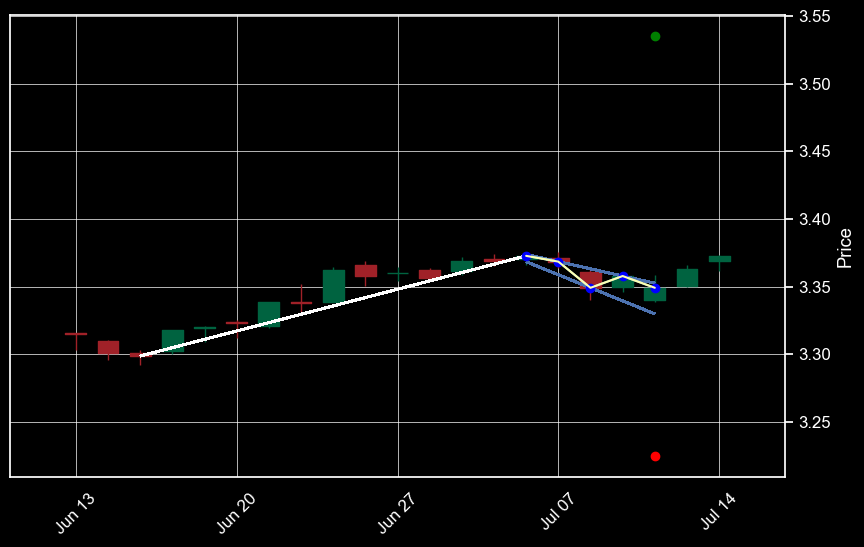

In [356]:
# print(len(bear_pennants))
plot_flag_and_pips(tmp_df, bull_flags[0], show_tp_sl=True, n_pips=5)
# plot_flag_and_pips(tmp_df, bull_flags[2])

In [291]:
def plot_hs(candle_data: pd.DataFrame, pat: HSPattern, pad: int = 2):
    if pad < 0:
        pad = 0

    idx = candle_data.index
    data = candle_data.iloc[pat.start_i:pat.break_i + 1 + pad]

    plt.style.use('dark_background')
    fig = plt.gcf()
    ax = fig.gca()

    l0 = [(idx[pat.start_i], pat.neck_start), (idx[pat.l_shoulder], pat.l_shoulder_p)]
    l1 = [(idx[pat.l_shoulder], pat.l_shoulder_p), (idx[pat.l_armpit], pat.l_armpit_p)]
    l2 = [(idx[pat.l_armpit], pat.l_armpit_p ), (idx[pat.head], pat.head_p)]
    l3 = [(idx[pat.head], pat.head_p ), (idx[pat.r_armpit], pat.r_armpit_p)]
    l4 = [(idx[pat.r_armpit], pat.r_armpit_p ), (idx[pat.r_shoulder], pat.r_shoulder_p)]
    l5 = [(idx[pat.r_shoulder], pat.r_shoulder_p ), (idx[pat.break_i], pat.neck_end)]
    neck = [(idx[pat.start_i], pat.neck_start), (idx[pat.break_i], pat.neck_end)]


    mpf.plot(data, alines=dict(alines=[l0, l1, l2, l3, l4, l5, neck ], colors=['w', 'w', 'w', 'w', 'w', 'w', 'r']), type='candle', style='charles', ax=ax)
    x = len(data) // 2 - len(data) * 0.1
    real_end = np.exp(pat.neck_end)
    if pat.inverted:
        y = pat.head_p + pat.head_height * 1.25
        tp = np.log(real_end * (1 + 0.2))
        sl = np.log(real_end * (1 - 0.1))
    else:
        y = pat.head_p - pat.head_height * 1.25
        tp = np.log(real_end * (1 - 0.2))
        sl = np.log(real_end * (1 + 0.1))
    plt.plot( pat.break_i - pat.start_i, tp, marker='o', color='green')
    plt.plot( pat.break_i - pat.start_i, sl, marker='o', color='red')
    # ax.text(x,y, f"BTC-USDT 1H ({idx[pat.start_i].strftime('%Y-%m-%d %H:%M')} - {idx[pat.break_i].strftime('%Y-%m-%d %H:%M')})", color='white', fontsize='xx-large')
    plt.show()

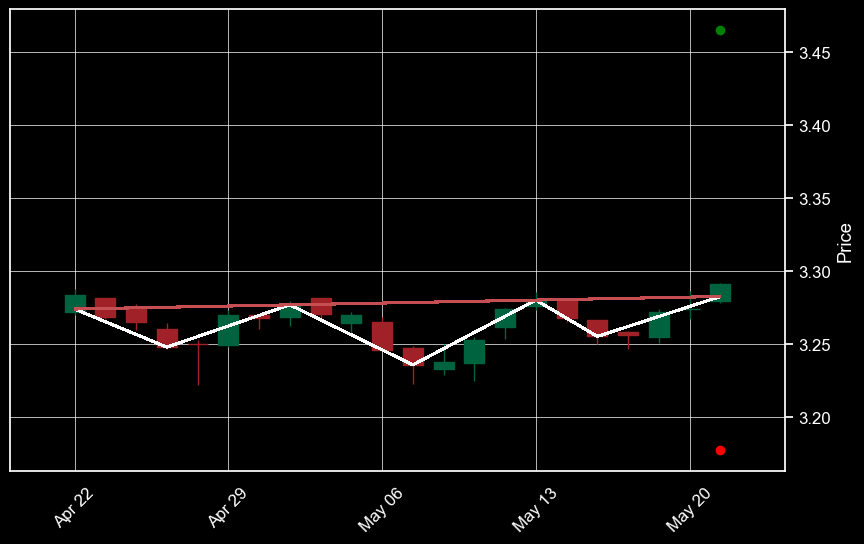

In [294]:
#test plot_hs
hs_patterns, ihs_patterns = find_hs_patterns(tmp_df_slice, 4, early_find=False)
# hs_patterns
plot_hs(tmp_df, ihs_patterns[0], pad=0)

In [262]:
def find_pattern_in_time_period(symbol = 'NASDAQ:GOOG', timeframe = '1 day',
                                start_date = '', end_date = '',
                                pattern_order = 10):
    # initialize data
    data = vbt.TVData.fetch(symbol, timeframe = timeframe).get()
    df = pd.DataFrame({'open': data['Open'], 'high': data['High'], 
                    'low': data['Low'], 'close': data['Close'], 
                    'volume': data['Volume']})
    df.index = data.index
    df.index.name = 'date'
    # time_period
    if(start_date == ''): start_date = df.index[0]
    if(end_date == ''): end_date = df.index[-1]
    mask = (df.index >= start_date) & (df.index <= end_date)
    df = df.loc[mask]

    # df plot flag
    tmp_df = np.log(df)
    tmp_df_slice = tmp_df['close'].to_numpy()
    bull_flags, bear_flags, bull_pennants, bear_pennants = find_flags_pennants_trendline(tmp_df_slice,
                                                                                          pattern_order)
    hs_patterns, ihs_patterns = find_hs_patterns(tmp_df_slice, pattern_order, early_find=False)
    pattern_d = {'bull_flags': len(bull_flags), 'bear_flags': len(bear_flags),
                'bull_pennants': len(bull_pennants), 'bear_pennants': len(bear_pennants),
                'hs_patterns': len(hs_patterns), 'ihs_patterns': len(ihs_patterns)}
    return pattern_d

In [ ]:
find_pattern_in_time_period()

In [271]:
def find_entries_exits(df: pd.DataFrame, pattern: FlagPattern, pad=2, n_pips=5,
              dist_measure=2):
    ''' 
    # dist_measure = 1 => Euclidean Distance
    # dist_measure = 2 => Perpindicular Distance
    # dist_measure = 3 => Vertical Distance
    '''
    if pad < 0:
        pad = 0

    start_i = pattern.base_x - pad
    end_i = pattern.conf_x + 1 + pad
    x = pd.DataFrame({'close' : df['close'], 
                        'idx' : [ i for i in range(len(df)) ] })
    x_num = x['close'].iloc[pattern.tip_x:pattern.conf_x + 1].to_numpy()
    # x_idx = x['idx'].iloc[pattern.tip_x - start_i:pattern.conf_x - start_i + 1].to_numpy()
    pips_x, pips_y = find_pips(x_num, n_pips, dist_measure)
    # pips_x = [i + pattern.tip_x - start_i for i in pips_x] # shift pips_x match pattern
    
    return pips_x, pips_y

In [360]:
def plot_pattern_in_time_period(symbol='NASDAQ:GOOG', timeframe='1 day',
                                start_date='', end_date='',
                                pattern='bull_flags', pattern_order=10,
                                pad=2, n_pips=5, dist_measure=2, show_tp_sl=False ):
    '''
    symbol = '{market}:{stock}'
    start_date and end_date = '{year: 2021}-{month: 12}-{day: 31}'
    pattern = {'bull_flags', 'bear_flags', 'bull_pennants', 'bear_pennants', 
    'hs_patterns', 'ihs_patterns'}
    '''
    # initialize data
    data = vbt.TVData.fetch(symbol, timeframe = timeframe).get()
    df = pd.DataFrame({'open': data['Open'], 'high': data['High'], 
                    'low': data['Low'], 'close': data['Close'], 
                    'volume': data['Volume']})
    df.index = data.index
    df.index.name = 'date'
    # time_period
    if(start_date == ''): start_date = df.index[0]
    if(end_date == ''): end_date = df.index[-1]
    mask = (df.index >= start_date) & (df.index <= end_date)
    df = df.loc[mask]

    # df plot flag
    tmp_df = np.log(df)
    tmp_df_slice = tmp_df['close'].to_numpy()
    bull_flags, bear_flags, bull_pennants, bear_pennants = find_flags_pennants_trendline(tmp_df_slice,
                                                                                          pattern_order)
    hs_patterns, ihs_patterns = find_hs_patterns(tmp_df_slice, pattern_order, early_find=False)
    
    pats = {'bull_flags': bull_flags, 'bear_flags': bear_flags
            , 'bull_pennants': bull_pennants, 'bear_pennants': bear_pennants
            , 'hs_patterns': hs_patterns, 'ihs_patterns': ihs_patterns}
    # check pattern is avaiable
    if pattern in pats:
        len_pattern = len(pats[pattern])
        if len_pattern >= 1: # have pattern
            if pattern != 'ihs_patterns' and pattern != 'hs_patterns':
                for i in range(len_pattern):
                    plot_flag_and_pips(candle_data=tmp_df, pattern=pats[pattern][i],   
                                    pad=pad, n_pips=n_pips, 
                                    dist_measure=dist_measure, show_tp_sl=show_tp_sl)
            elif pattern == 'hs_patterns':
                for i in range(len_pattern):
                    plot_hs(candle_data=tmp_df, pat = hs_patterns[i], pad=pad)
            elif pattern == 'ihs_patterns':
                for i in range(len_pattern):
                    plot_hs(candle_data=tmp_df, pat = ihs_patterns[i], pad=pad)
        else:
            print('does not have this pattern in time period!')
    else:
        print('wrong pattern!')
    # return pattern_d

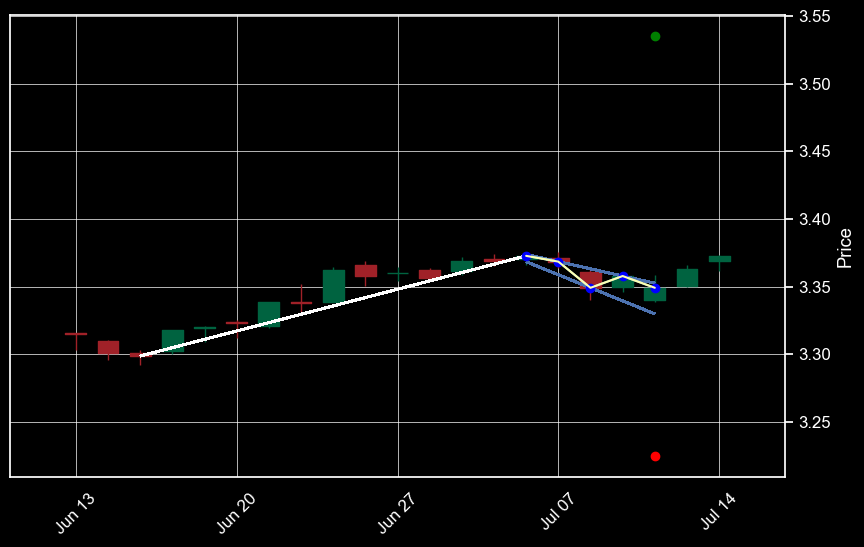

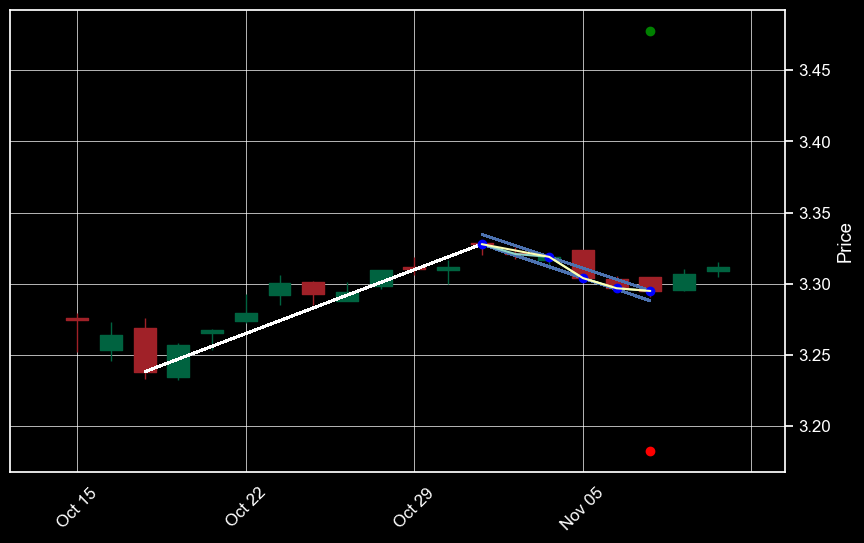

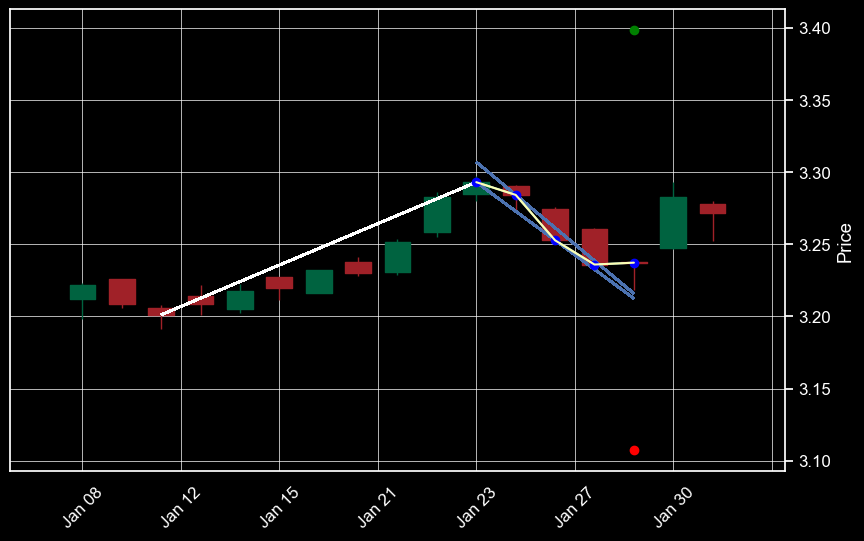

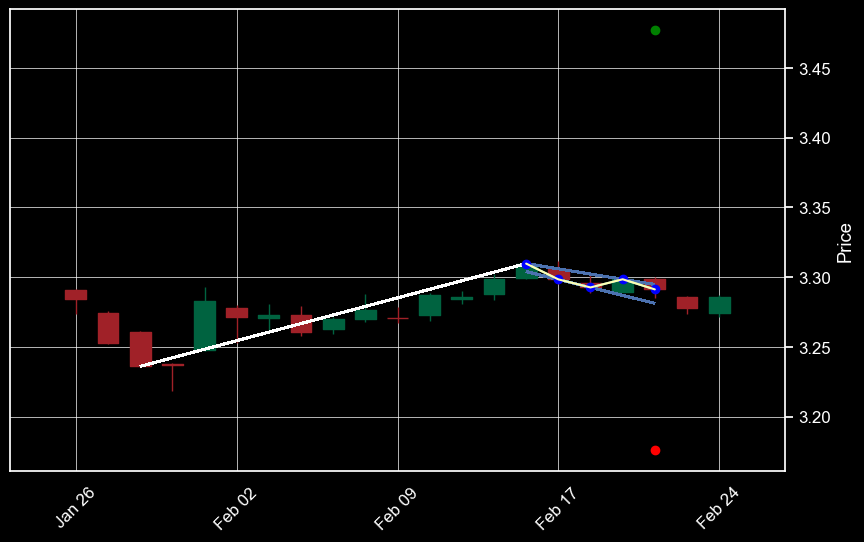

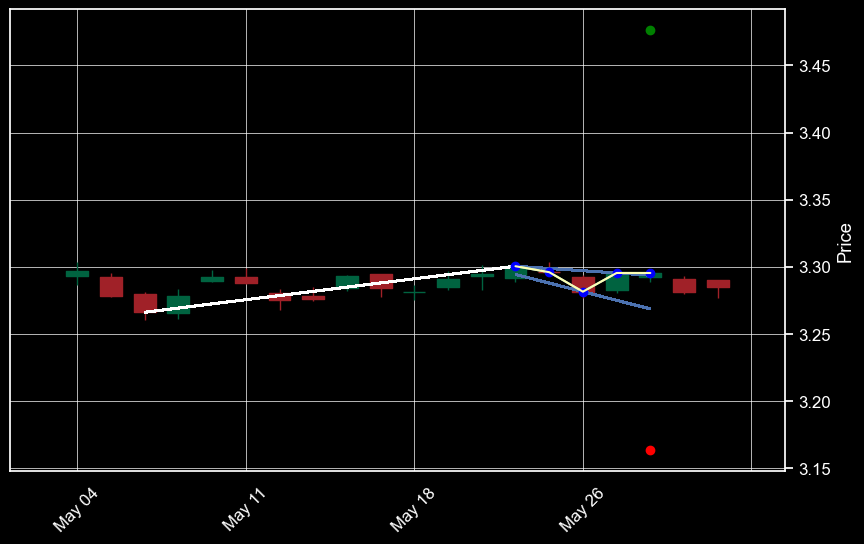

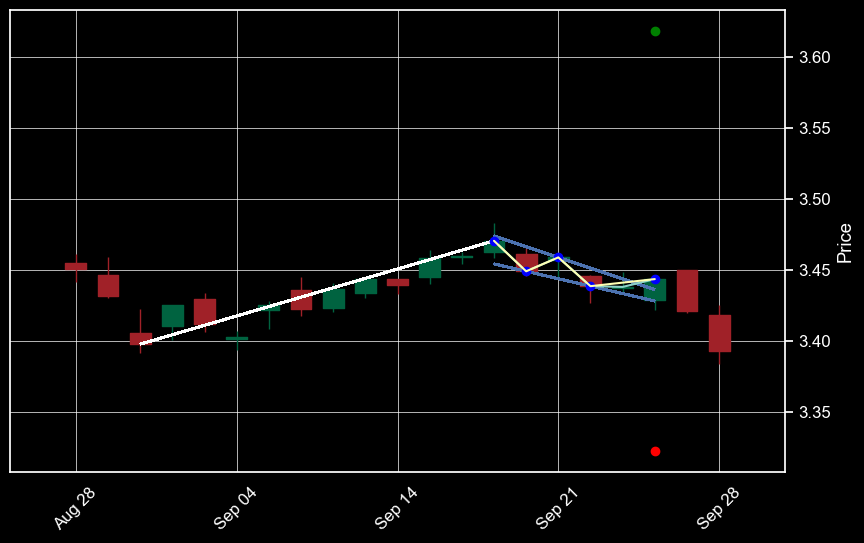

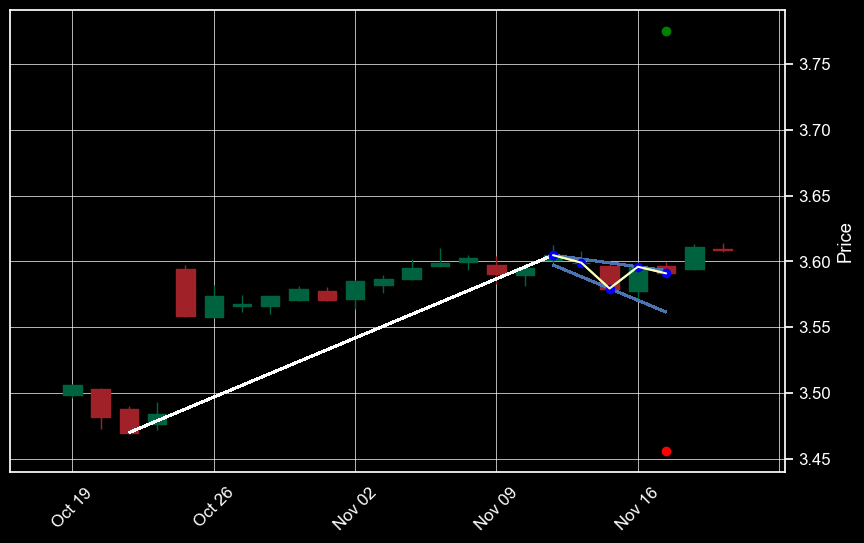

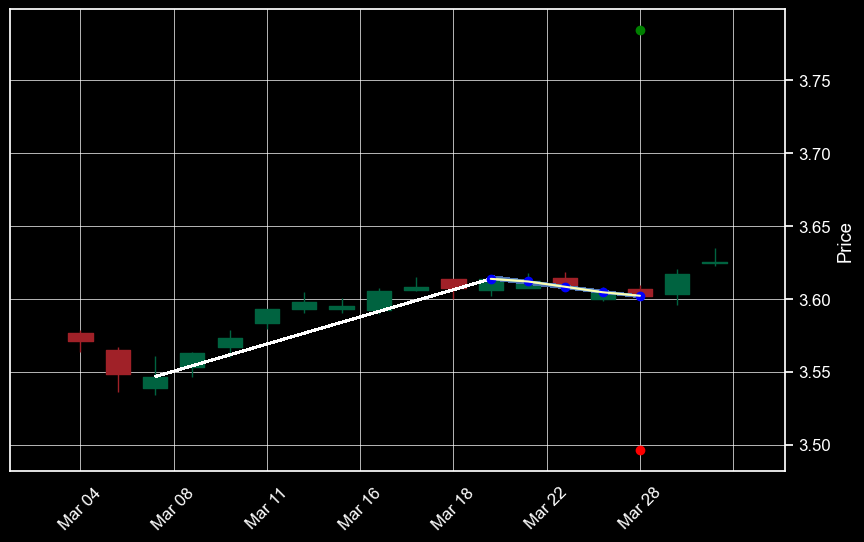

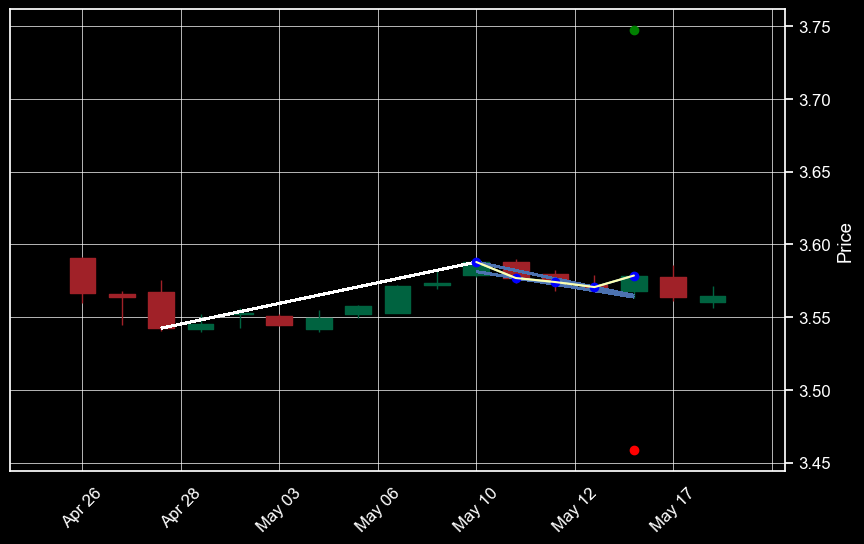

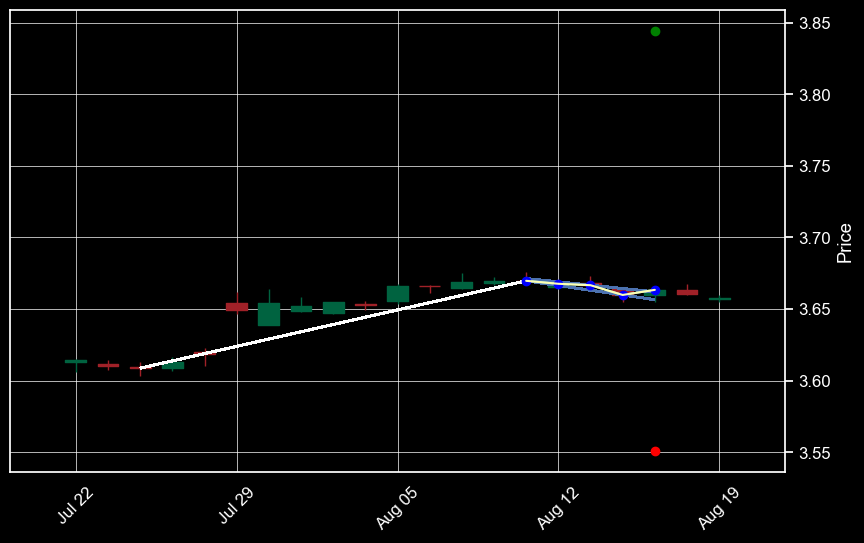

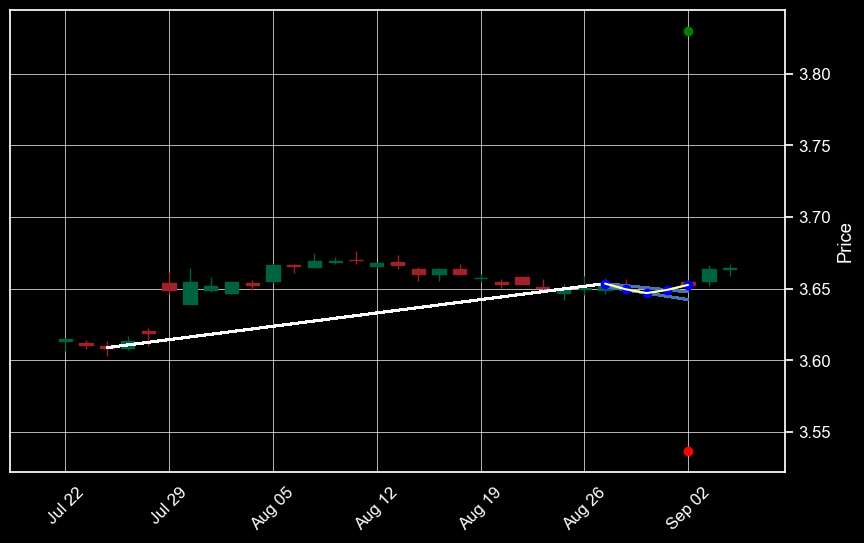

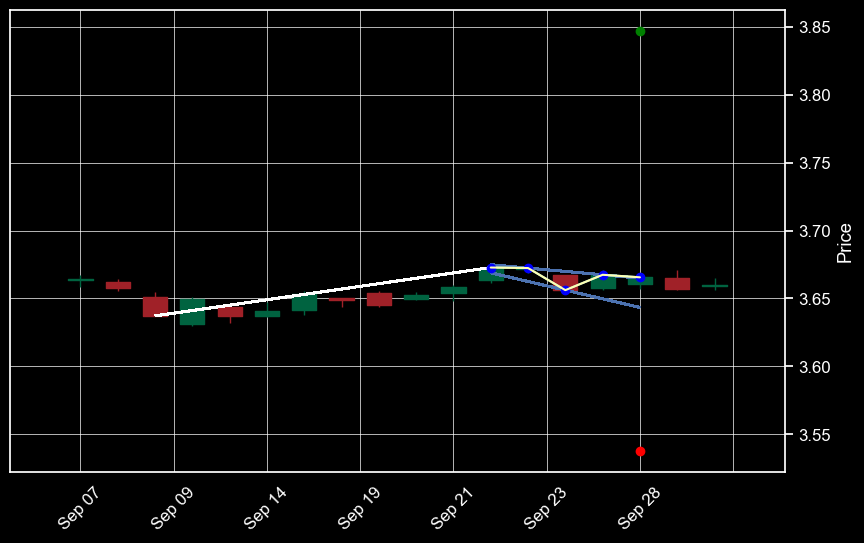

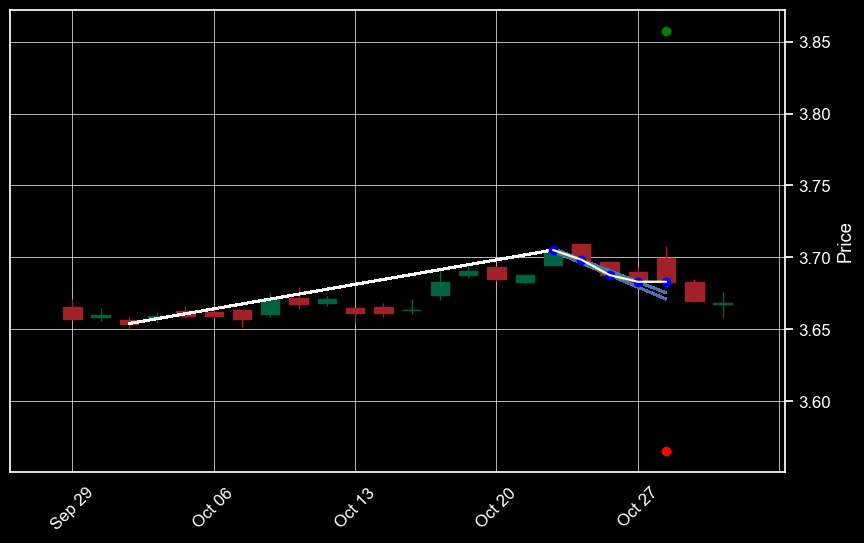

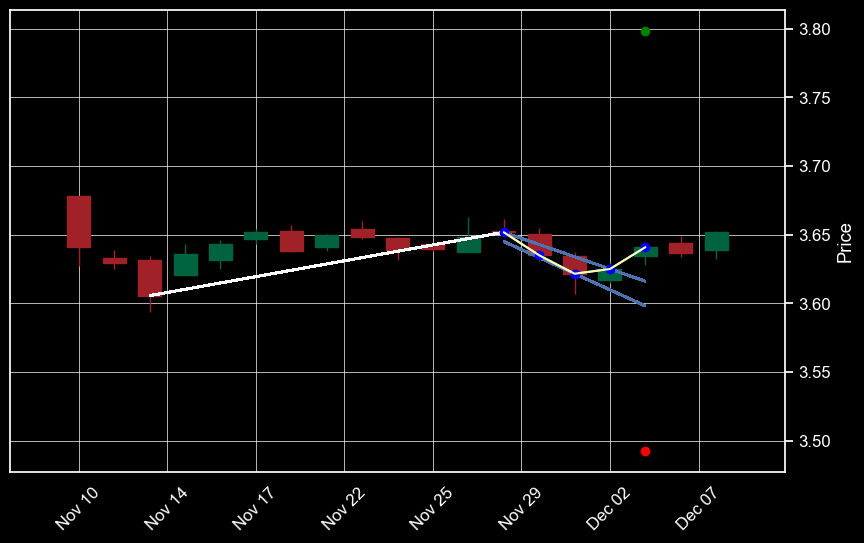

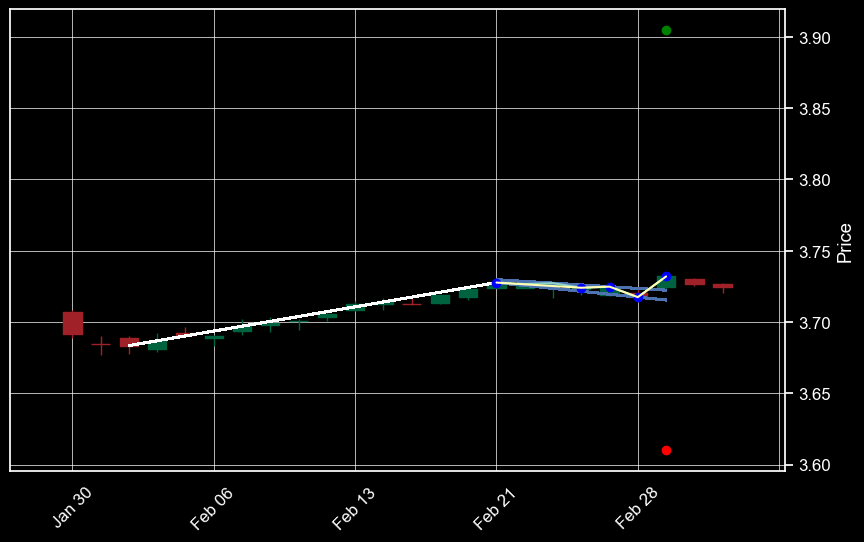

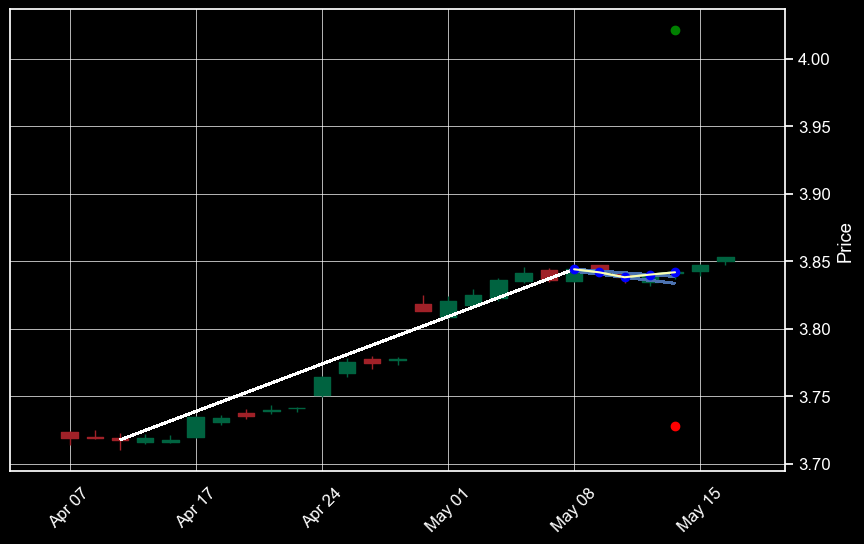

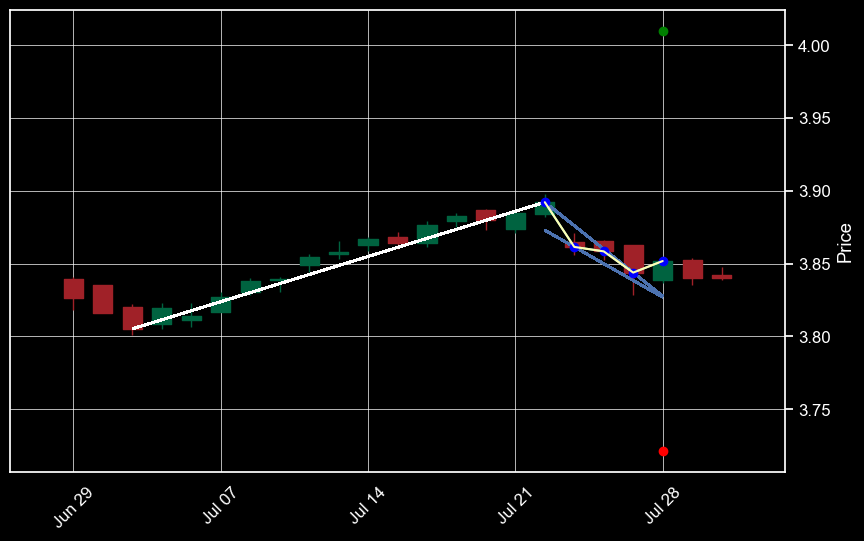

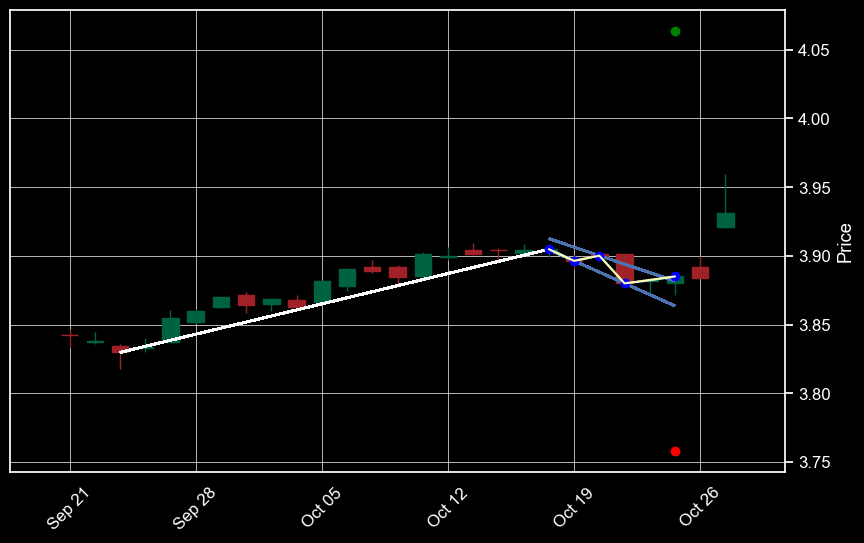

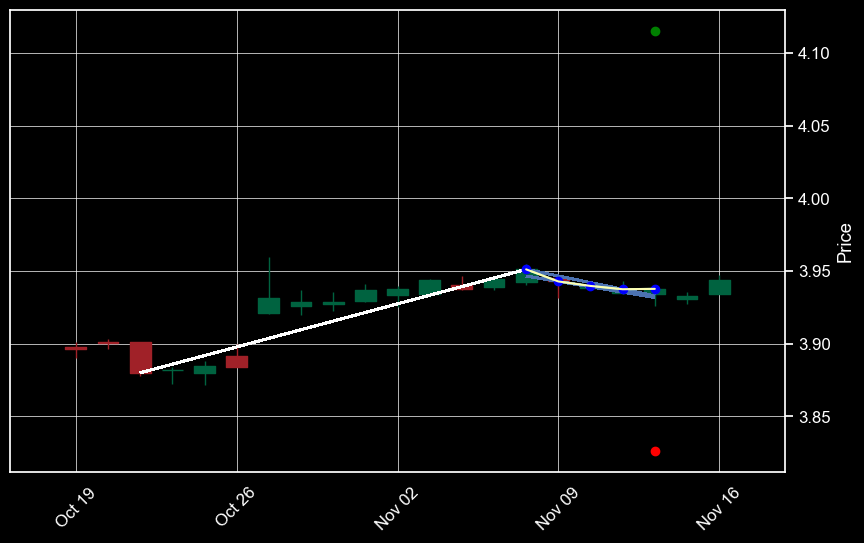

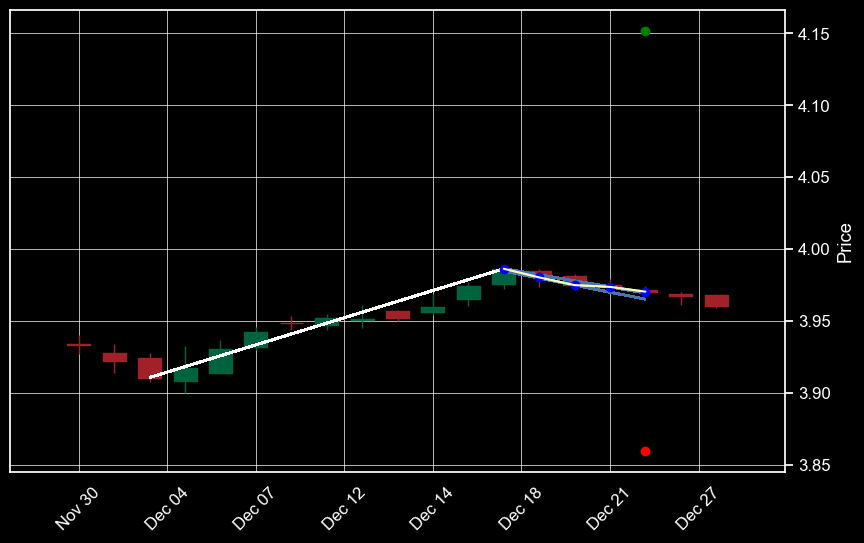

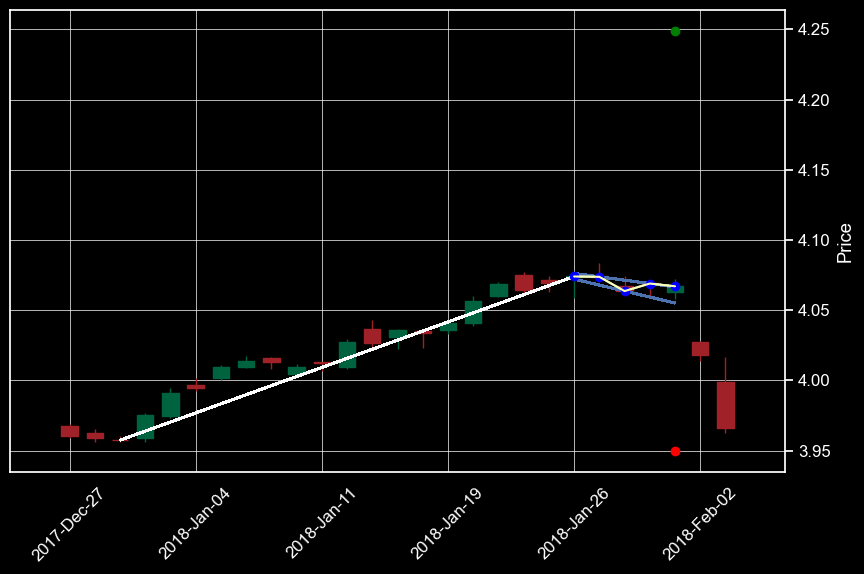

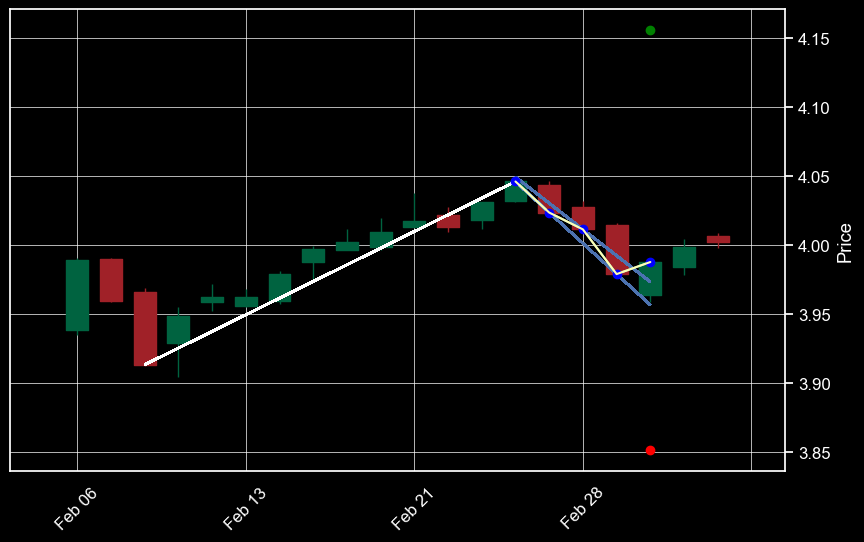

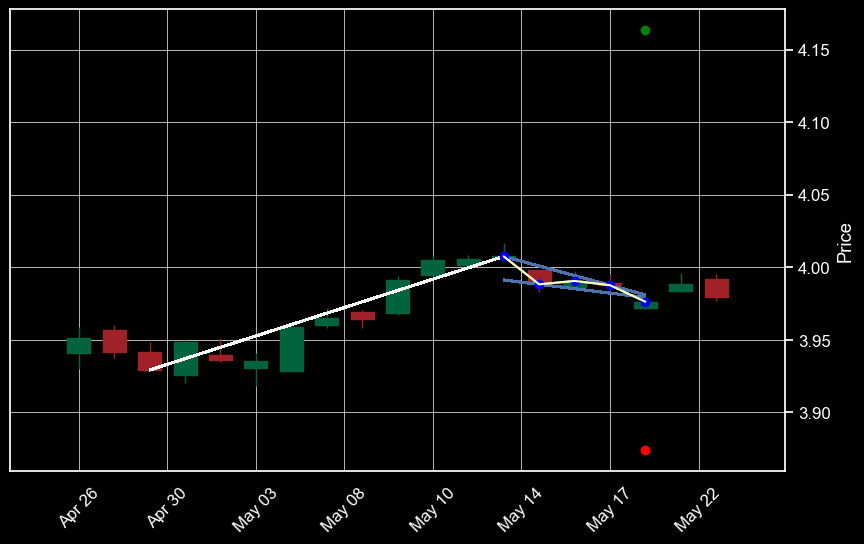

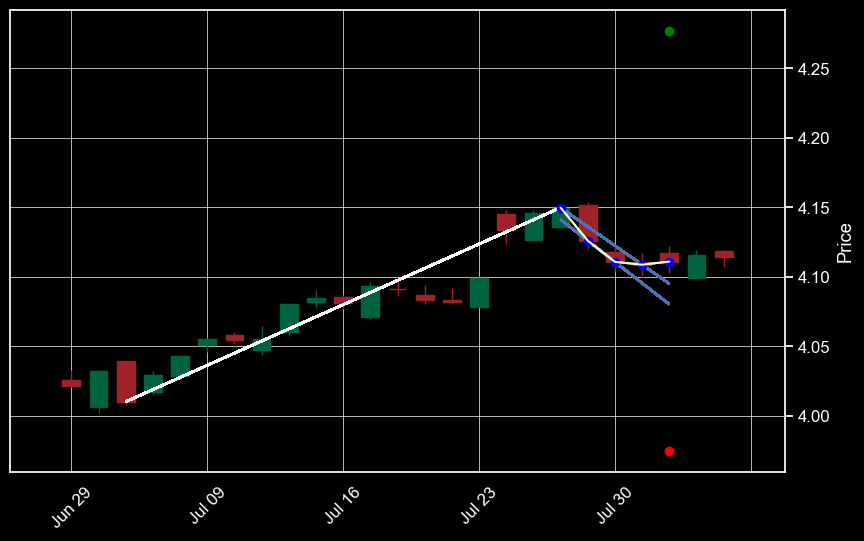

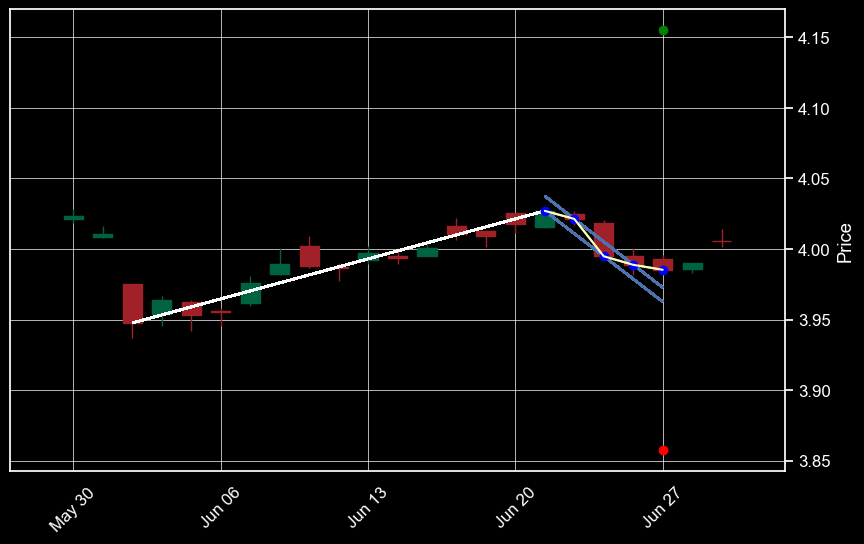

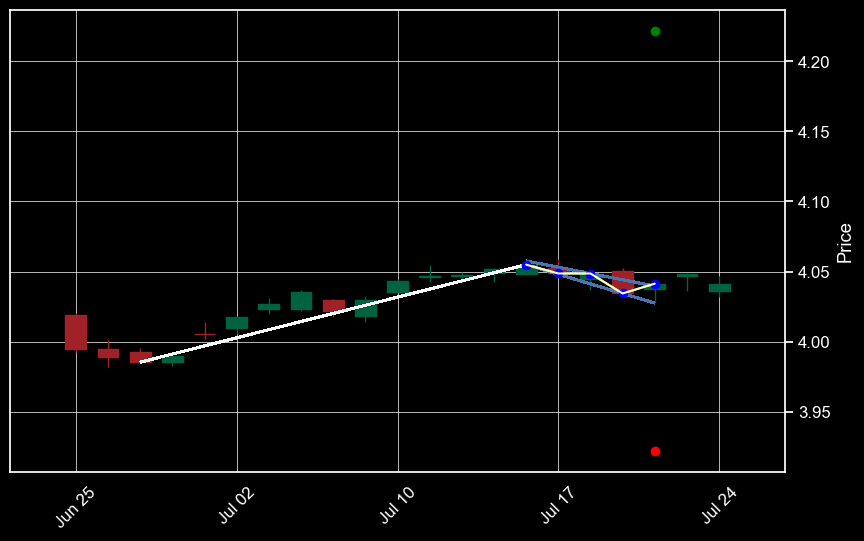

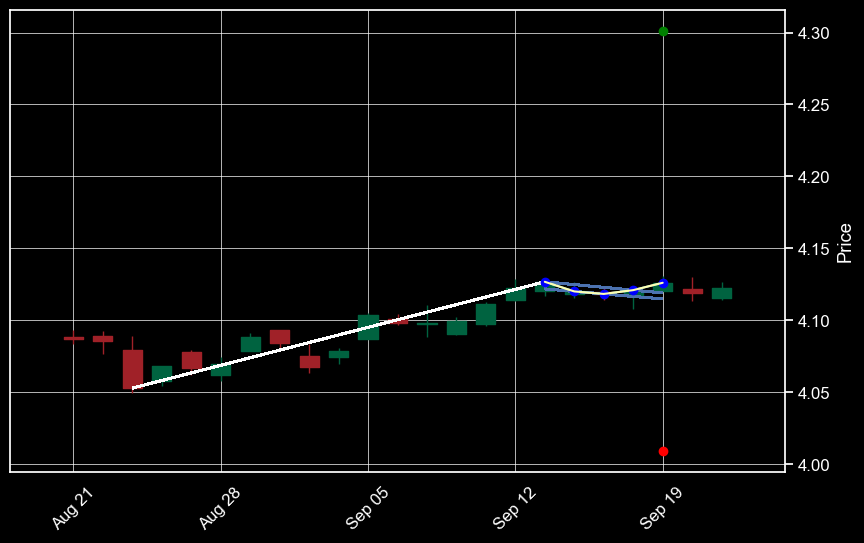

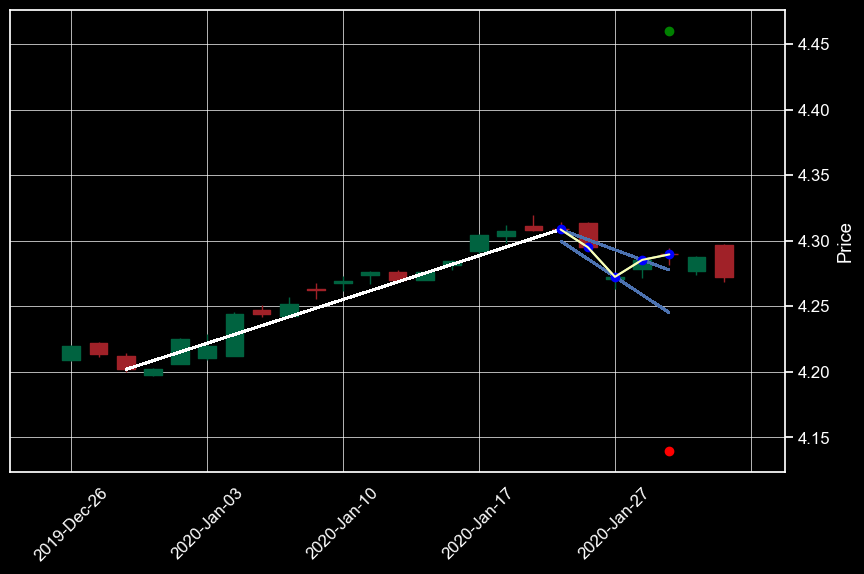

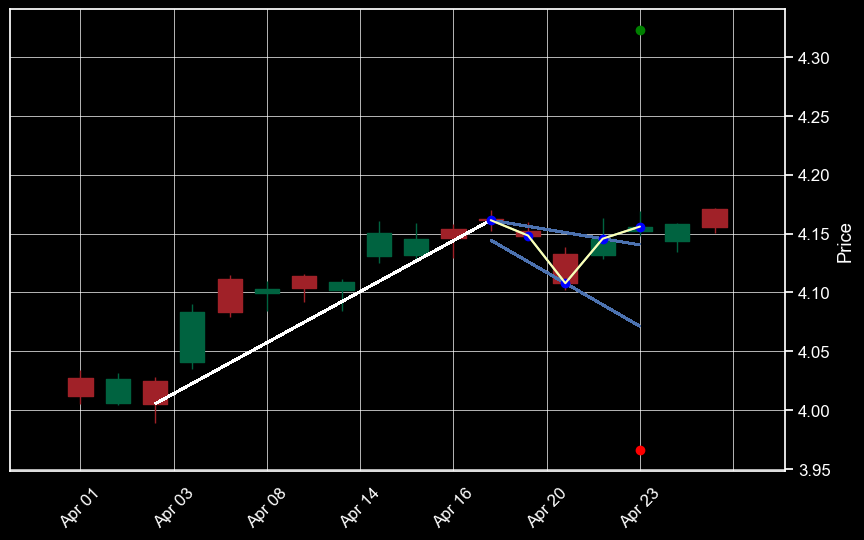

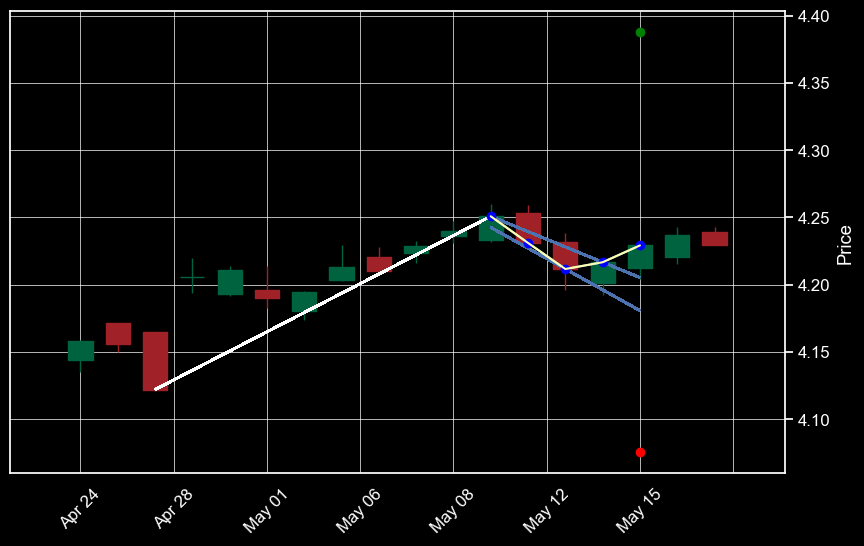

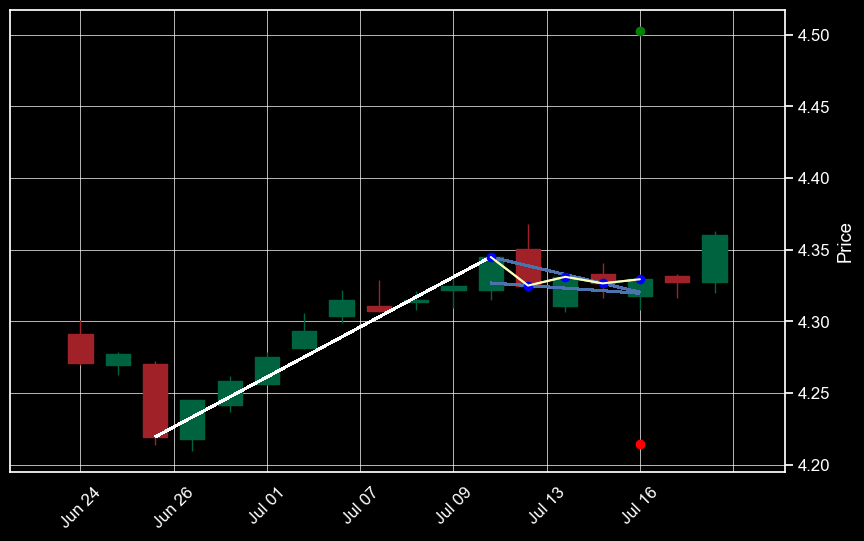

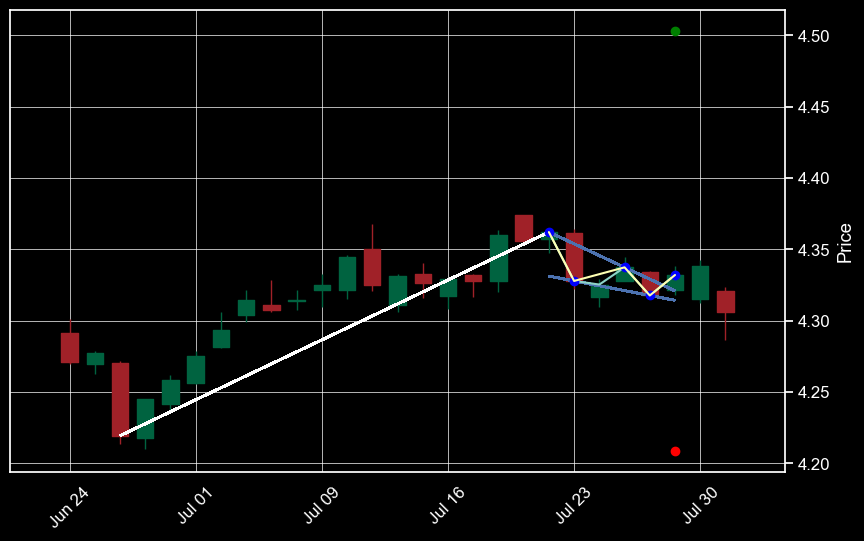

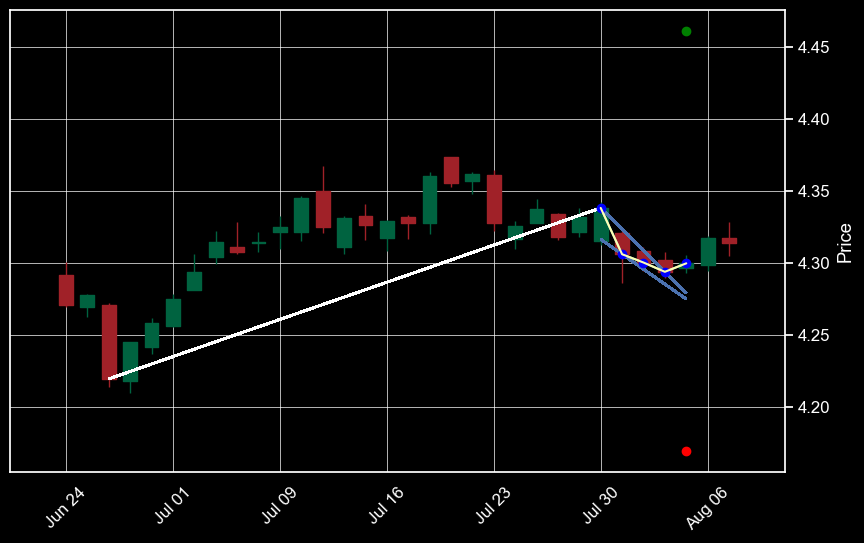

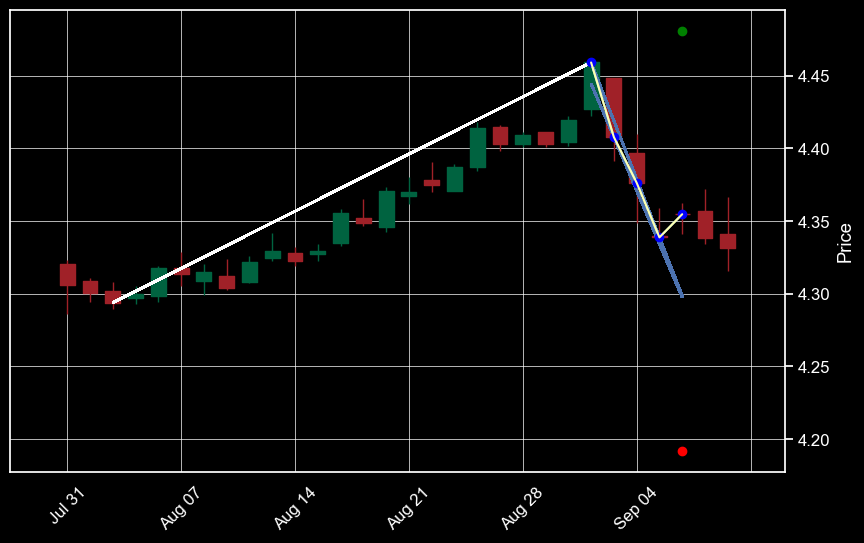

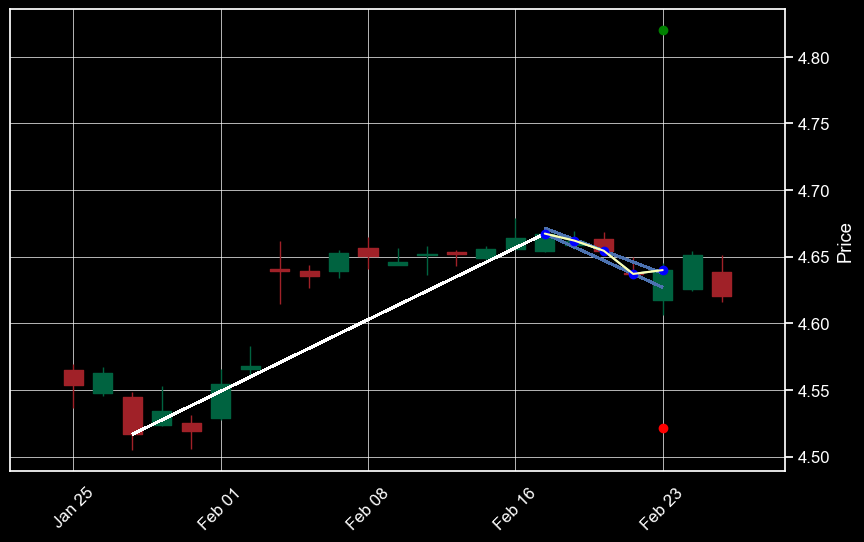

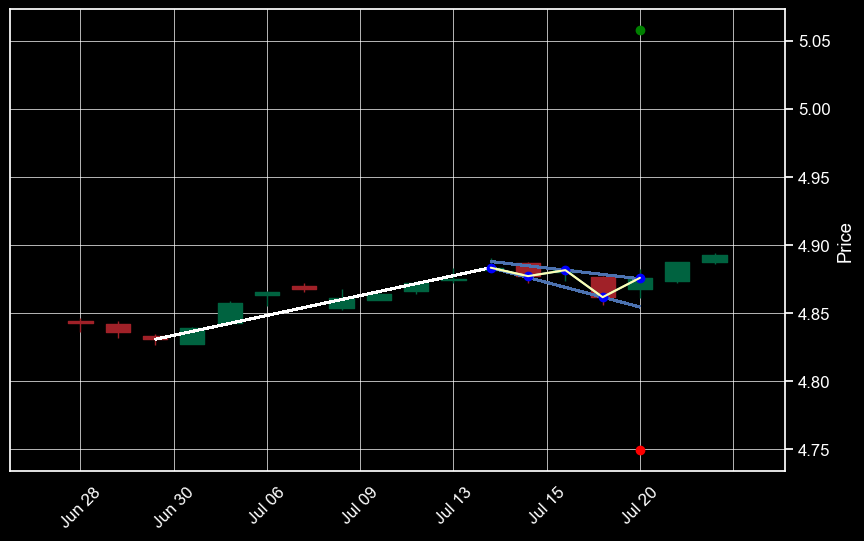

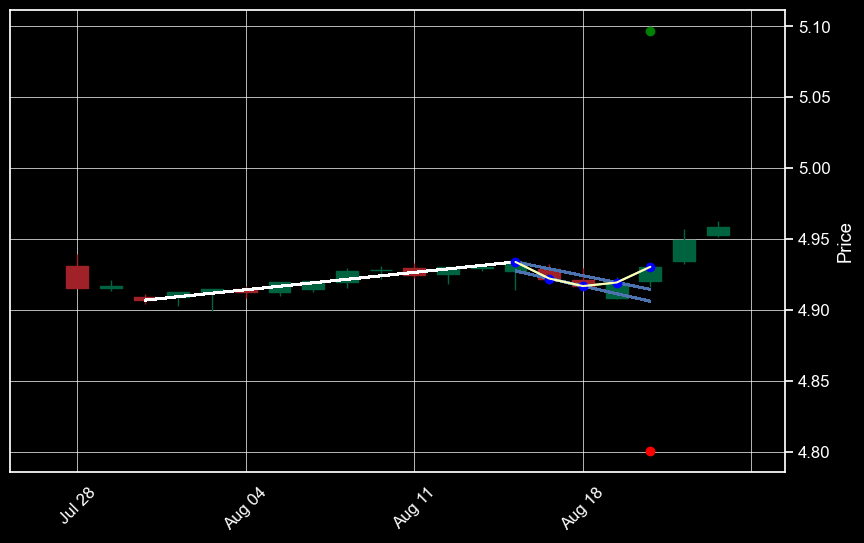

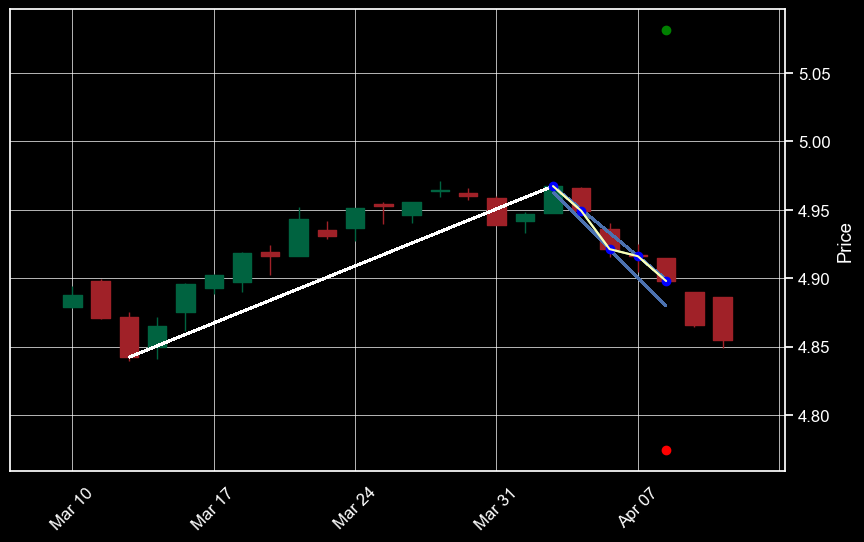

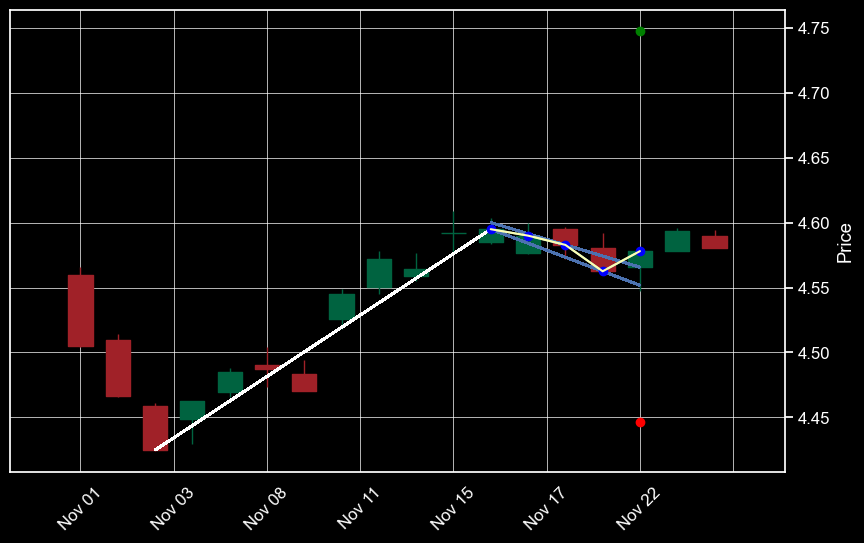

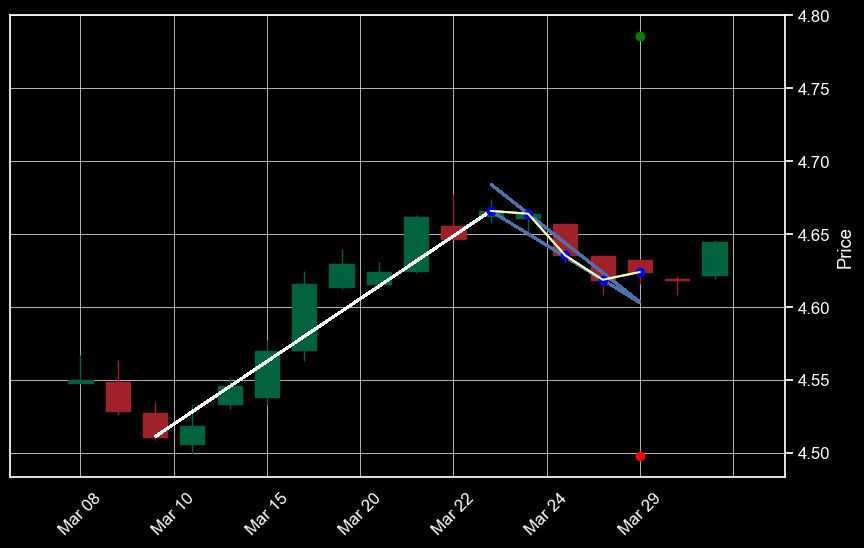

In [362]:
plot_pattern_in_time_period( pattern = 'bull_flags', pattern_order=4, show_tp_sl=True)

### entry เมื่อ ราคาปิด breakout (ได้ทั้งเส้นบนและล่าง)
1. หา index ที่ราคาปิด
2. หาราคา close ของวันนั้น
3. ถ้า close > ราคา breakout ก็ entry ที่ตำแหน่งนั้น


In [ ]:
# entry